# 2022 NZMSA Data Science Submission.

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline


# Exploratory Data Analysis.

In [2]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [3]:
#Showing the numerical values of:
#Average
#Standard deviation
#Percentile range: 25th and 75th

dataset.describe().loc[['mean','std','25%','75%']]

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN


In [4]:
#Checking for any null values

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   station         103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


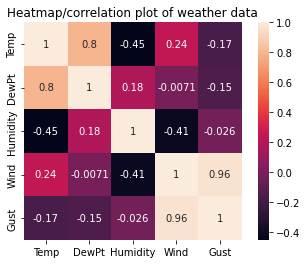

In [5]:
#Correlation plot
new_dataset = dataset.drop(['peak_wind_drct'], axis=1)
new_dataset.columns = ['Station', 'Valid', 'Temp', 'DewPt','Humidity','Wind','Gust']
ax = plt.axes()
sns.heatmap(new_dataset.corr(),square=True,annot=True, ax=ax)
ax.set_title('Heatmap/correlation plot of weather data')
plt.show()

In [6]:
#Comments

In [7]:
#Converting 'valid' column to datetime to allow for time series plots
dataset['valid'] = dataset['valid'].astype('datetime64[ns]')

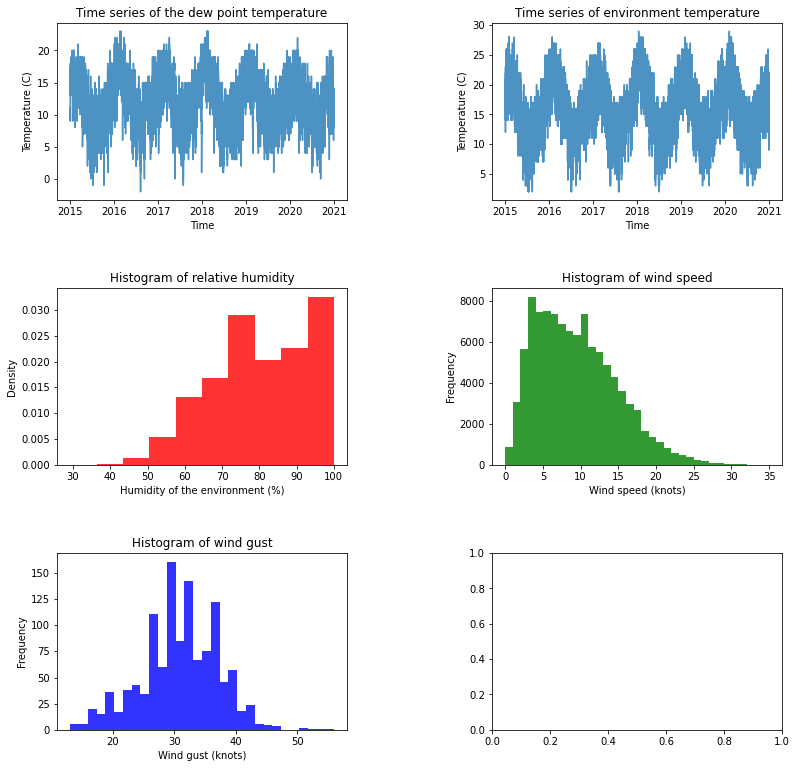

In [8]:

figure, axis = plt.subplots(3,2, figsize =(13,13))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

axis[0,0].plot(dataset['valid'], dataset['dwpc'], alpha=0.8);
axis[0,0].set_ylabel("Temperature (C)");
axis[0,0].set_xlabel("Time");
axis[0,0].set_title("Time series of the dew point temperature");

axis[0,1].plot(dataset['valid'], dataset['tmpc'], alpha=0.8);
axis[0,1].set_ylabel("Temperature (C)");
axis[0,1].set_xlabel("Time");
axis[0,1].set_title("Time series of environment temperature");

axis[1,0].hist(dataset['relh'],10, density=True, facecolor ='r', alpha =0.8);
axis[1,0].set_xlabel("Humidity of the environment (%)");
axis[1,0].set_ylabel("Density");
axis[1,0].set_title("Histogram of relative humidity");

axis[1,1].hist(dataset['sknt'], 35, density=False, facecolor='g', alpha = 0.8, range=[0,35]);
axis[1,1].set_xlabel("Wind speed (knots)");
axis[1,1].set_ylabel("Frequency");
axis[1,1].set_title("Histogram of wind speed");

axis[2,0].hist(dataset['gust'], 30, facecolor ='b', alpha=0.8);
axis[2,0].set_xlabel("Wind gust (knots)");
axis[2,0].set_ylabel("Frequency");
axis[2,0].set_title("Histogram of wind gust");

# Data Processing

In [9]:
dataset.head()

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30:00,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30:00,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00:00,21.0,12.0,56.38,16.0,NaN,NaN


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   station         103713 non-null  object        
 1   valid           103713 non-null  datetime64[ns]
 2   tmpc            103678 non-null  float64       
 3   dwpc            103678 non-null  float64       
 4   relh            103593 non-null  float64       
 5   sknt            103704 non-null  float64       
 6   gust            1203 non-null    float64       
 7   peak_wind_drct  0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.3+ MB


In [11]:
#Making the decision to drop both the gust and peak wind gust direction as there isn't
#sufficient data as shown by the low number of non-null counts. 
dataset.drop(columns=['gust', 'peak_wind_drct'], inplace=True)
dataset.head()

,station,valid,tmpc,dwpc,relh,sknt
0,NZAA,2015-01-01 00:00:00,21.0,11.0,52.77,15.0
1,NZAA,2015-01-01 00:30:00,21.0,10.0,49.37,16.0
2,NZAA,2015-01-01 01:00:00,21.0,12.0,56.38,16.0
3,NZAA,2015-01-01 01:30:00,21.0,13.0,60.21,16.0
4,NZAA,2015-01-01 02:00:00,21.0,12.0,56.38,16.0


In [12]:
#There were still some rows that contained null values for any of the given data types
#I decided to remove all rows that contained null values, as there weren't that many compared to the total sample size
dataset = dataset.dropna(axis=0, how='any')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103584 entries, 0 to 103712
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   station  103584 non-null  object        
 1   valid    103584 non-null  datetime64[ns]
 2   tmpc     103584 non-null  float64       
 3   dwpc     103584 non-null  float64       
 4   relh     103584 non-null  float64       
 5   sknt     103584 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 5.5+ MB


In [13]:
#Checking whether or not the stations column contains anything other than NZAA
print('NZAA' not in set(dataset['station']))
#As it returns false, it means all the data comes from station NZAA, so we can drop that column as its constant
dataset.drop(columns=['station'], inplace=True)
dataset.head()

False


,valid,tmpc,dwpc,relh,sknt
0,2015-01-01 00:00:00,21.0,11.0,52.77,15.0
1,2015-01-01 00:30:00,21.0,10.0,49.37,16.0
2,2015-01-01 01:00:00,21.0,12.0,56.38,16.0
3,2015-01-01 01:30:00,21.0,13.0,60.21,16.0
4,2015-01-01 02:00:00,21.0,12.0,56.38,16.0


In [14]:
#Dropping the date time column as everything is in chronological order anyways
dataset.drop(columns=['valid'], inplace=True)
dataset.head()

,tmpc,dwpc,relh,sknt
0,21.0,11.0,52.77,15.0
1,21.0,10.0,49.37,16.0
2,21.0,12.0,56.38,16.0
3,21.0,13.0,60.21,16.0
4,21.0,12.0,56.38,16.0


In [15]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(dataset, dataset[['tmpc', 'dwpc', 'relh', 'sknt']], test_size = 0.2)

In [16]:
#x_train.info()

In [17]:
#x_test.info()

In [18]:
#y_train.info()

# Data Modelling

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#dataset['target'] = dataset.shift(-1)['tmpc']
#dataset = dataset.iloc[:-1,:].copy()

In [20]:


#x_train, x_test, y_train, y_test = train_test_split(dataset[['tmpc', 'dwpc', 'relh', 'sknt']], dataset['target'], test_size = 0.2)

#model = DecisionTreeRegressor()
#odel.fit(x_train, y_train)
y = dataset.pop('tmpc')
x = dataset

In [21]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [22]:
model = DecisionTreeRegressor(random_state=0)
model.fit(train_x, train_y)

DecisionTreeRegressor(random_state=0)

In [23]:
predict = model.predict(test_x)
import numpy as np
np.mean((predict-test_y)**2)

0.0007240430564270889

In [24]:
pd.DataFrame({'actual':test_y, 'prediction':predict, 'diff':(test_y - predict)})

,actual,prediction,diff
52,23.0,23.0,0.0
93438,14.0,14.0,0.0
77824,15.0,15.0,0.0
61167,12.0,12.0,0.0
91063,17.0,17.0,0.0
...,...,...,...
99449,18.0,18.0,0.0
68408,18.0,18.0,0.0
6143,10.0,10.0,0.0
23863,16.0,16.0,0.0


# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.